<a href="https://colab.research.google.com/github/kagst27/SeattlePublicLibraryData/blob/main/Seattle_Public_Library_Checkouts%2C_and_Inventory_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [35]:
from google.colab import drive
drive.mount ('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd /content/drive/MyDrive/Google_Colab /Colab Notebooks/Checkouts By Title Dataset/


/content/drive/MyDrive/Google_Colab /Colab Notebooks/Checkouts By Title Dataset


In [66]:
pwd

'/content/drive/My Drive/Google_Colab /Colab Notebooks/Checkouts By Title Dataset'

In [37]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [38]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

In [39]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/MyDrive/Google_Colab /Colab Notebooks/Checkouts By Title Dataset': ['Checkouts_by_Title.csv', 'Checkouts Data Analysis OI.ipynb', 'Seattle Public Library Checkouts, and Inventory Dataset Analysis.ipynb']


### *What is the dataset, Checkouts *
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

###### Item type : 

###### Publisher

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.
######

In [40]:
nRowsRead = 2000000 # specify 'None' if want to read whole file
data = pd.read_csv("Checkouts_by_Title.csv", usecols = ['UsageClass', 'CheckoutType', 'MaterialType', 'CheckoutYear', 'CheckoutMonth','Checkouts', 'Title'],  nrows = nRowsRead, keep_default_na = True, )
data.dataframeName = 'Checkouts_by_Title.csv'
nRows, nCol = data.shape
data.head(10)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title
0,Physical,Horizon,VISUAL,2016,11,2,The private eyes [videorecording] / a Tri Star...
1,Physical,Horizon,SOUNDDISC,2016,11,10,Dap-dippin' with-- Sharon Jones & the Dap-Kings.
2,Physical,Horizon,BOOK,2016,11,6,Animal beauty / Kristin Roskifte ; translation...
3,Physical,Horizon,BOOK,2016,11,1,Black and white; a portrait of Aubrey Beardsley.
4,Physical,Horizon,BOOK,2016,11,8,The Dorito effect : the surprising new truth a...
5,Physical,Horizon,SOUNDDISC,2016,11,1,Ancient hula Hawaiian style. Volume I [sound r...
6,Physical,Horizon,BOOK,2016,11,1,Trickster magic : tap into the energy and powe...
7,Physical,Horizon,BOOK,2016,11,7,Calculating the cosmos : how mathematics unvei...
8,Physical,Horizon,BOOK,2016,11,1,Keeping a blue light on : a citizen's tribute ...
9,Physical,Horizon,BOOK,2016,11,1,A dog's way home / Bobbie Pyron.


### Identifying Missing Data, and Tidying Up Data: 

##### Here is the missing data for each of the columns we are concerned about. 'Author' values missing being the most 15.75 % of the total data. Followed by publication year & Publisher. In this case it would not make sense to fill in missing data as the missing values are specific to the item types, and so on... 

In [41]:
missing_values = data.isnull().sum()
missing_values

UsageClass       0
CheckoutType     0
MaterialType     0
CheckoutYear     0
CheckoutMonth    0
Checkouts        0
Title            0
dtype: int64

#### Data Tally 

In [42]:
MaterialType = data['MaterialType'].value_counts(ascending=True)
MaterialType = pd.DataFrame(MaterialType[-10:]).reset_index()
MaterialType.columns = ["MaterialType", "ItemCount"]
MaterialType

,MaterialType,ItemCount
0,MIXED,15184
1,MUSIC,16397
2,SONG,42784
3,SOUNDCASS,46150
4,AUDIOBOOK,51314
5,VIDEOCASS,107641
6,VIDEODISC,115198
7,EBOOK,133214
8,SOUNDDISC,224736
9,BOOK,1226582


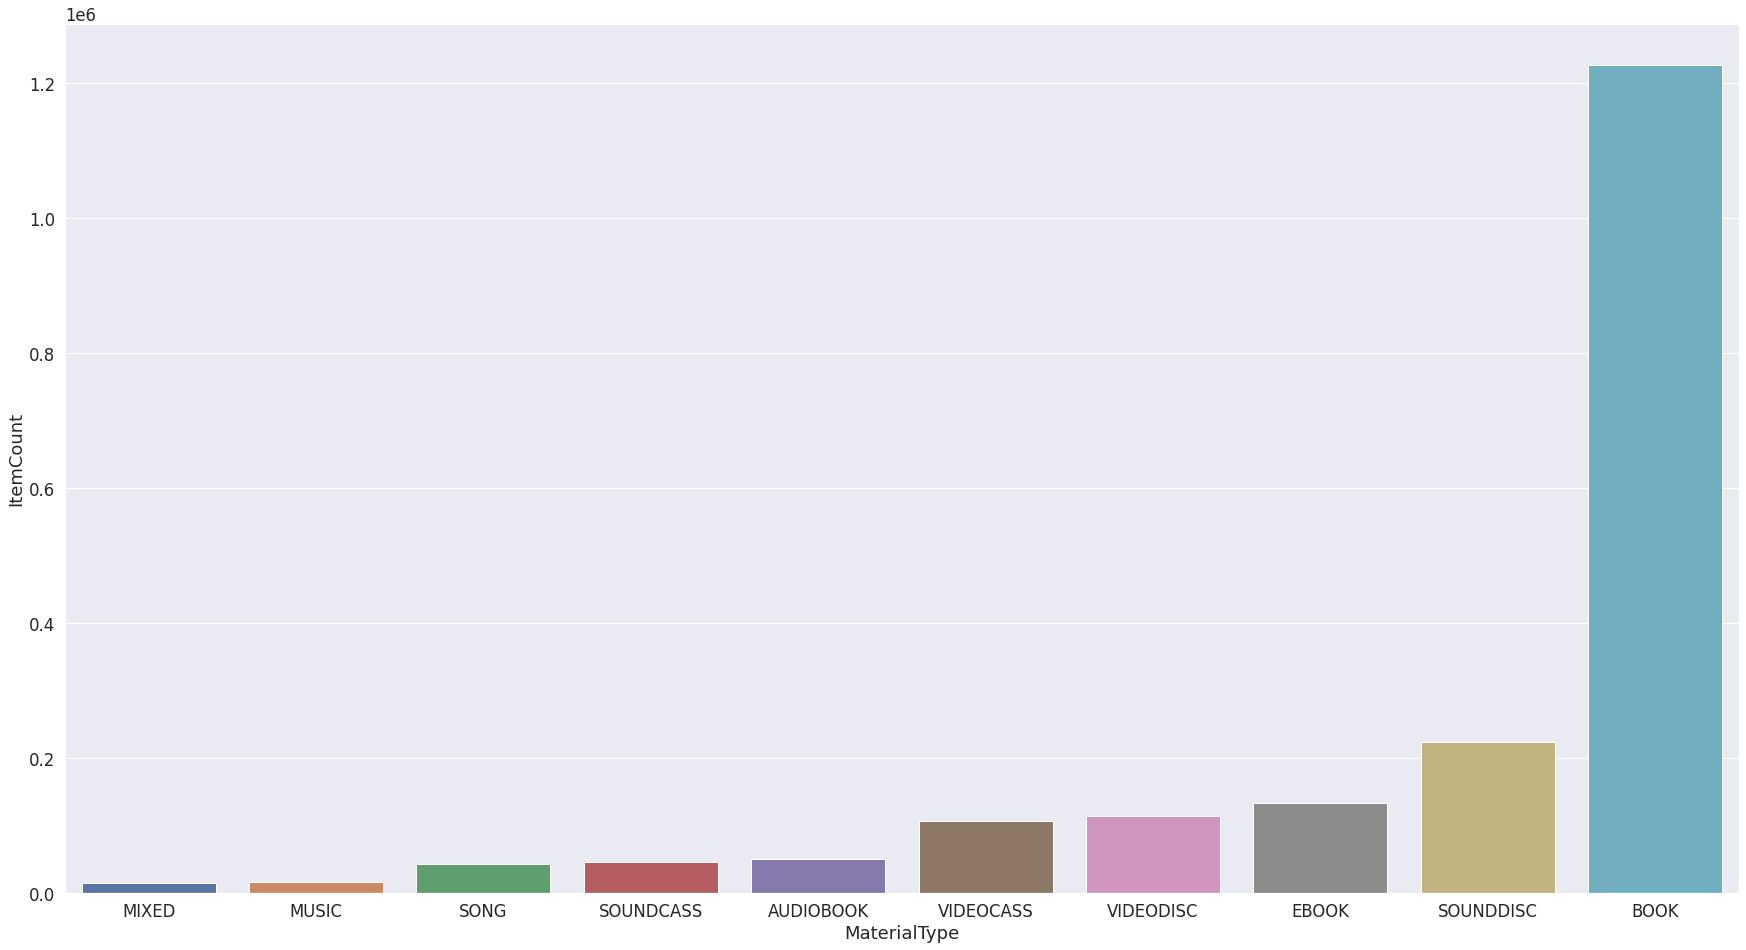

In [43]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='MaterialType',y='ItemCount', data=MaterialType)

### Trend of checkouts over the years since 2005

In [44]:
CheckoutYear = data['CheckoutYear'].value_counts(ascending=True)
CheckoutYear = pd.DataFrame(CheckoutYear[-50:]).reset_index()
CheckoutYear.columns = ["CheckoutYear", "ItemCount"]
CheckoutYear.tail(25)

,CheckoutYear,ItemCount
0,2006,10431
1,2017,238388
2,2016,419529
3,2005,1331652


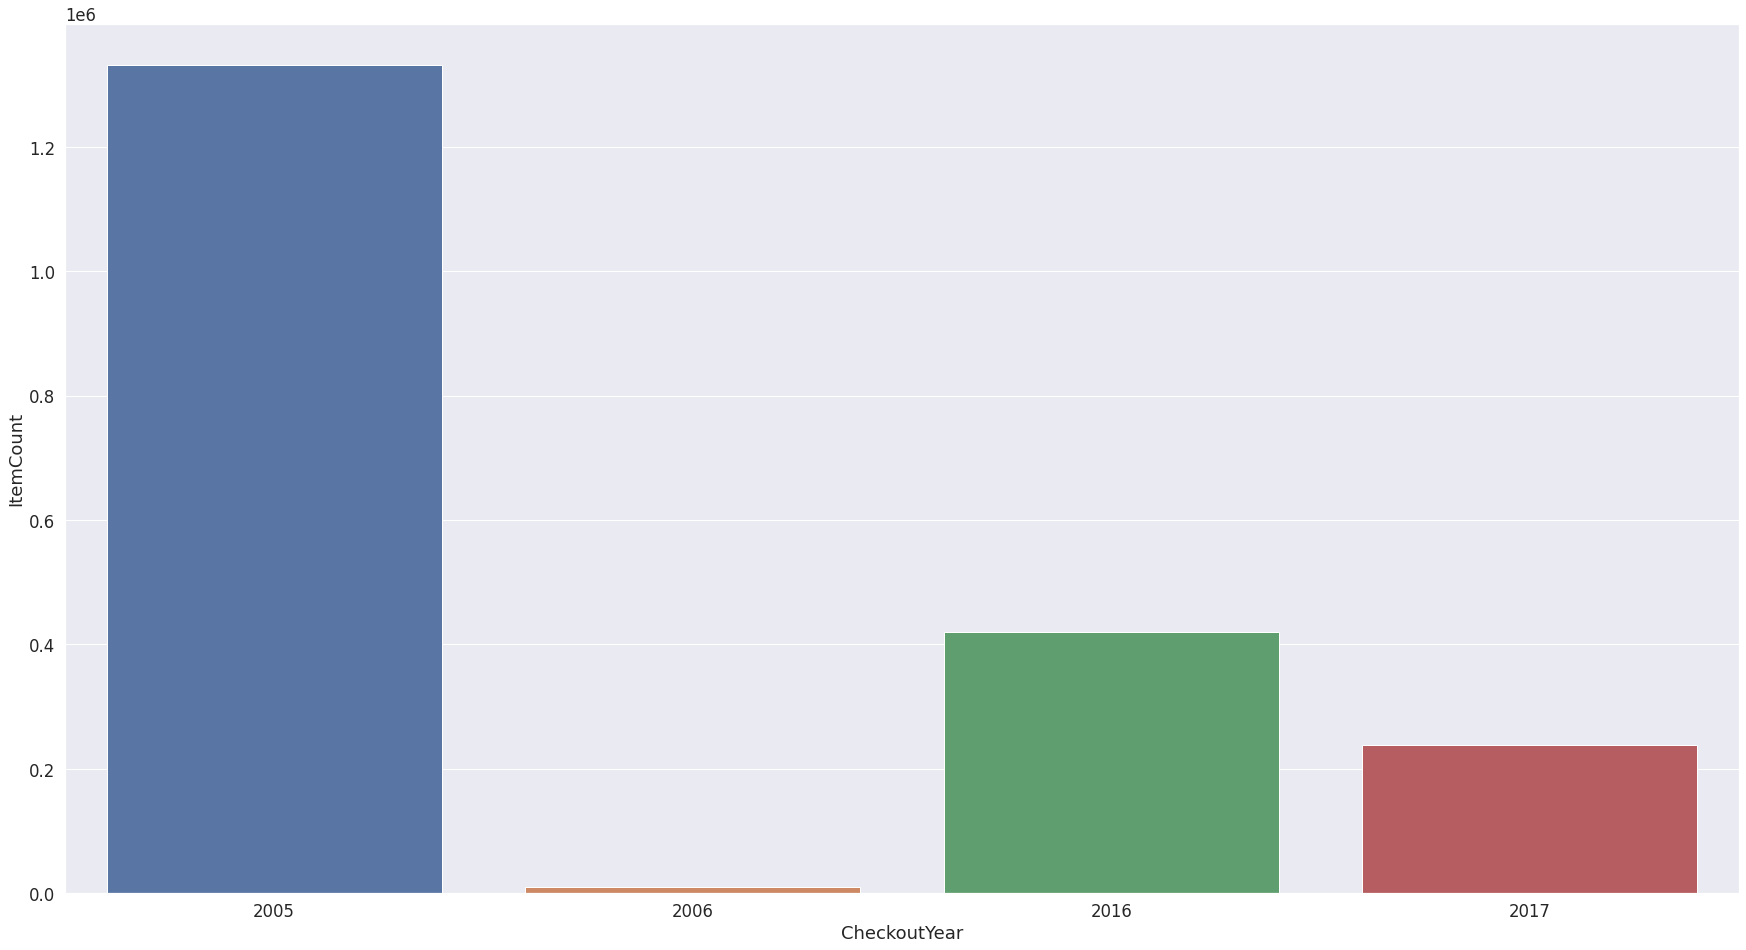

In [45]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='CheckoutYear',y='ItemCount', data=CheckoutYear)

In [46]:
CheckoutType = data['CheckoutType'].value_counts(ascending=True)
CheckoutType = pd.DataFrame(CheckoutType[-50:]).reset_index()
CheckoutType.columns = ["CheckoutType", "ItemCount"]
CheckoutType.head(5)

,CheckoutType,ItemCount
0,Zinio,358
1,Hoopla,17896
2,Freegal,42784
3,OverDrive,184894
4,Horizon,1754068


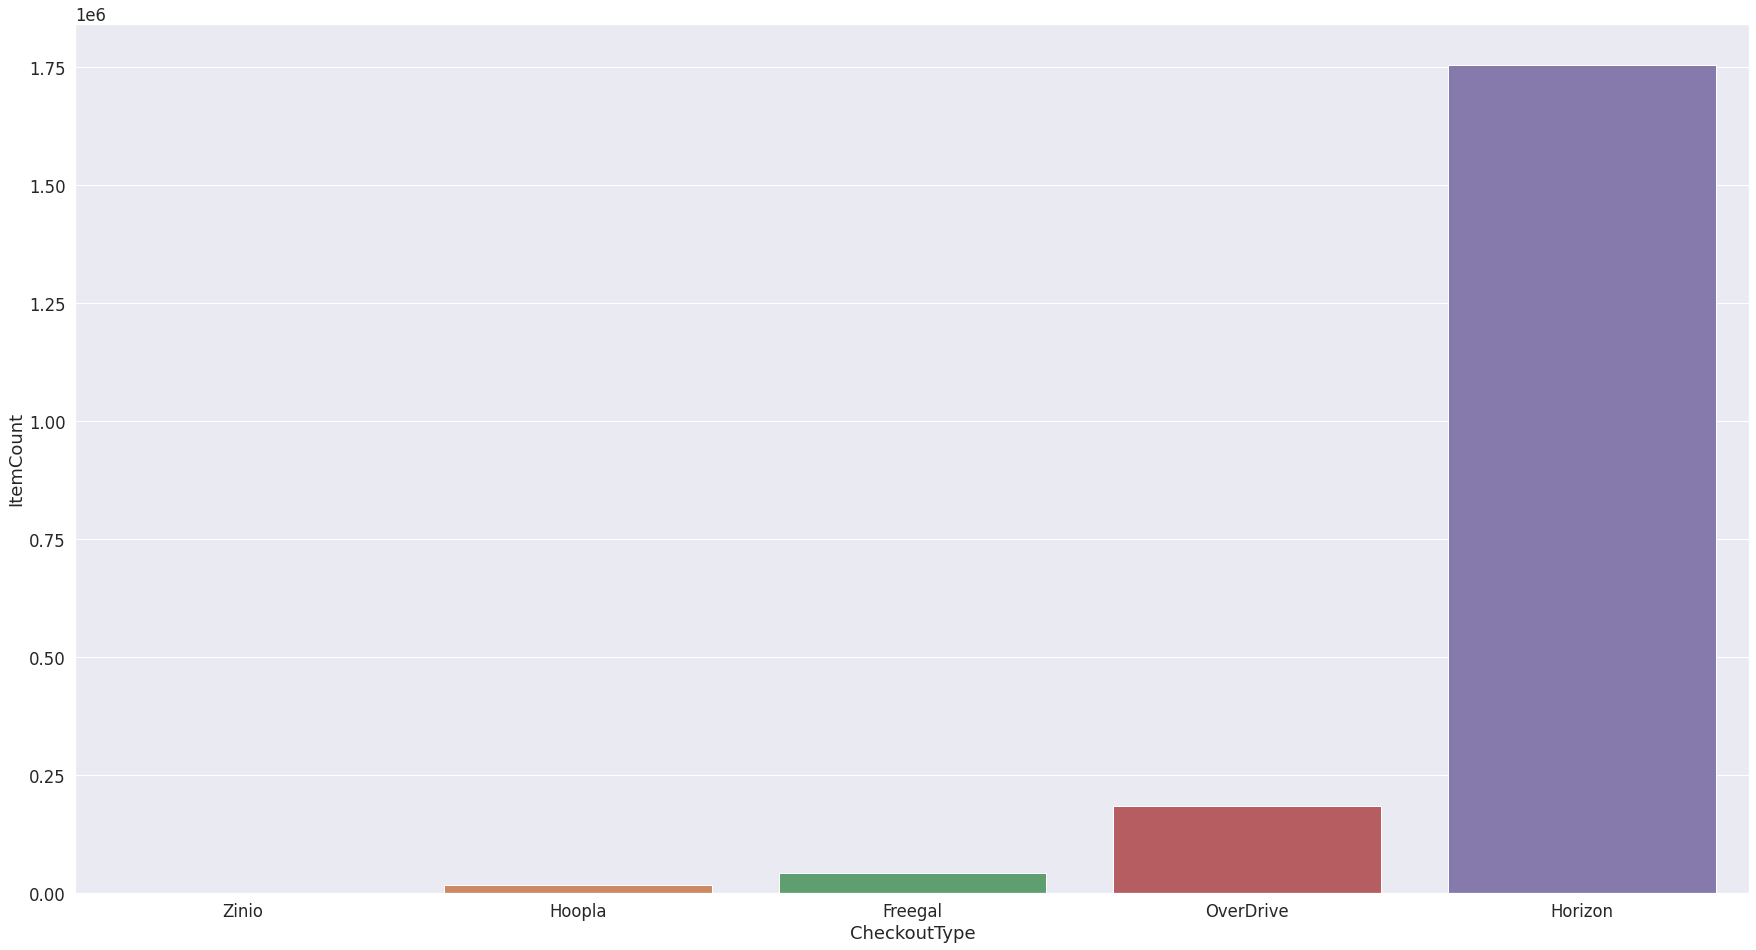

In [47]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='CheckoutType',y='ItemCount', data=CheckoutType)

In [48]:
lor = data[data['Title'].str.contains("The Lord of the Rings")]

In [49]:
np.unique(lor['Title'])[0:10]

array(['J.R.R. Tolkien and the Birth Of "The Lord of the Rings" And "The Hobbit"',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (unabridged selections) (Unabridged Selections)',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (unabridged) (Unabridged)',
       'The Lord of the Rings',
       'The Lord of the Rings (From "Lord of the Rings")',
       'The Lord of the Rings : the art of The return of the king / Gary Russell.',
       'The Lord of the Rings : the art of The two towers / Gary Russell.',
       'The Return of the King: The Lord of the Rings Series, Book 3 (unabridged selections) (Unabridged Selections)',
       'The Two Towers: The Lord of the Rings Series, Book 2 (unabridged selections) (Unabridged Selections)'],
      dtype=object)

In [50]:
lor_checkouts_by_date = lor.groupby(['CheckoutYear', 'CheckoutMonth']).sum('Checkouts').reset_index()
lor_checkouts_by_date['Date'] = pd.to_datetime( lor_checkouts_by_date['CheckoutYear']*100+ lor_checkouts_by_date['CheckoutMonth'], format="%Y%m")
lor_checkouts_by_date.tail()

,CheckoutYear,CheckoutMonth,Checkouts,Date
8,2005,12,1,2005-12-01
9,2006,1,1,2006-01-01
10,2016,11,43,2016-11-01
11,2016,12,54,2016-12-01
12,2017,1,54,2017-01-01


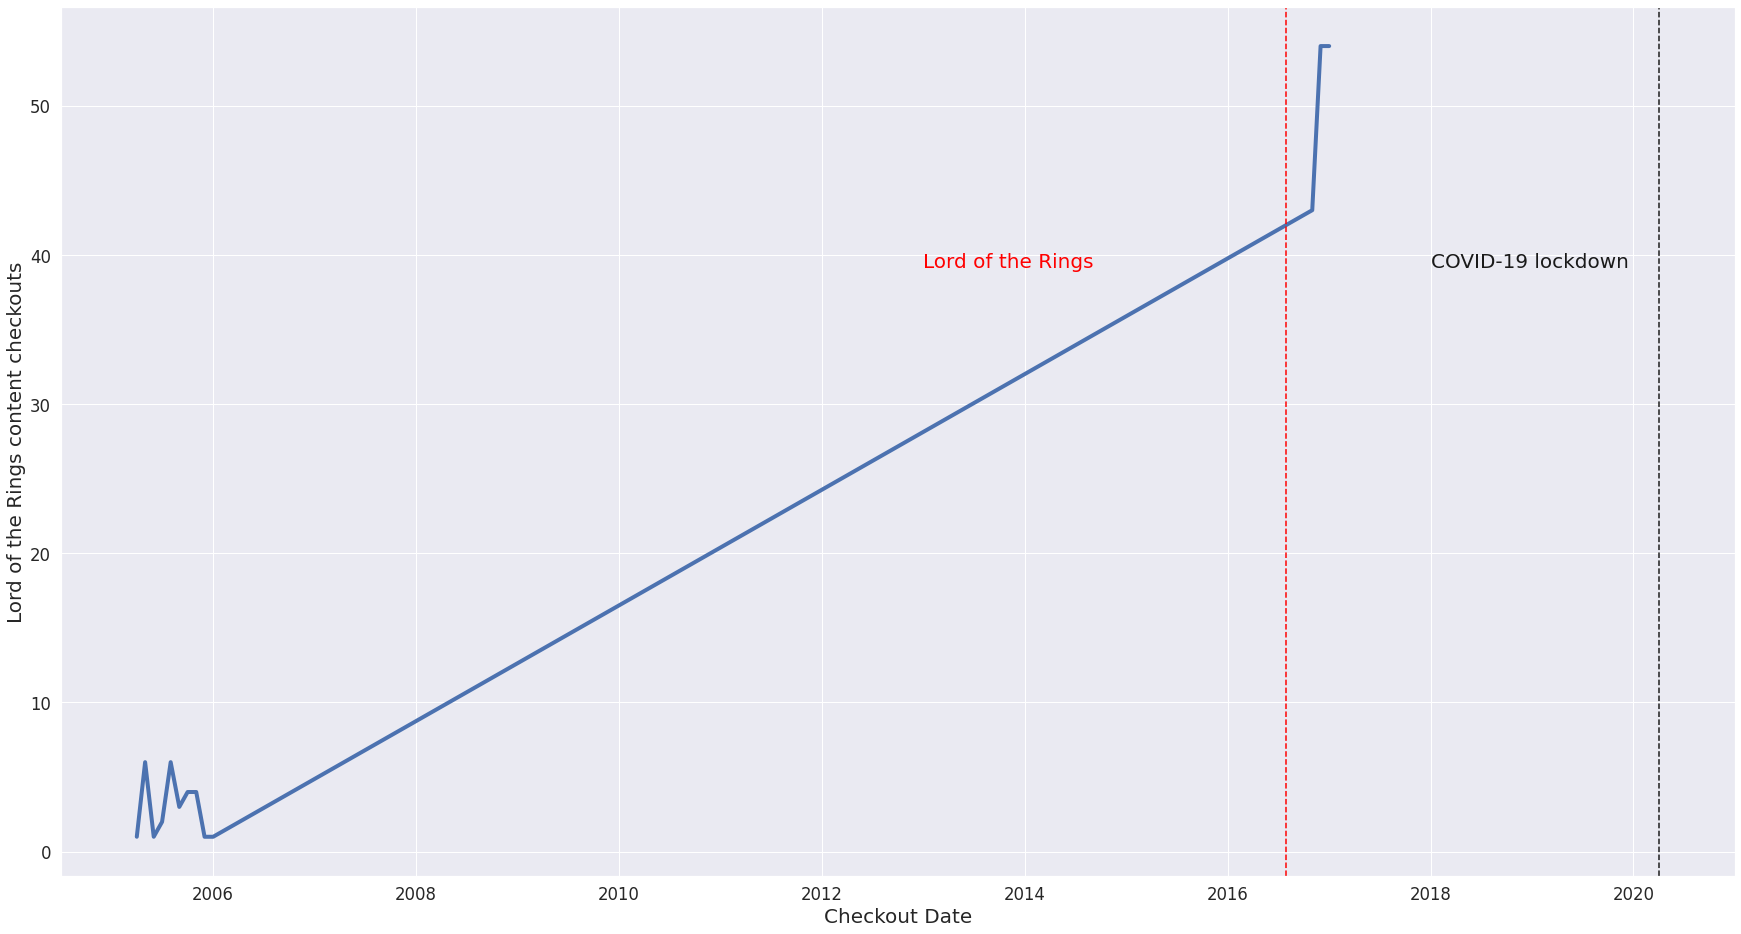

In [51]:
lor = sns.lineplot(x = "Date", y = "Checkouts", data = lor_checkouts_by_date, linewidth = 4)
trans = lor.get_xaxis_transform()
lor.set_xlabel("Checkout Date", fontsize = 20)
lor.set_ylabel("Lord of the Rings content checkouts", fontsize = 20)
lor.axvline(datetime(2016, 7, 30), color="red", linestyle = "--")
lor.axvline(datetime(2020, 4, 1), color="k", linestyle = "--")
lor.text(datetime(2013, 1, 1), .7, 'Lord of the Rings', color="red", fontsize = 20, transform=trans)
lor.text(datetime(2018, 1, 1), .7, 'COVID-19 lockdown', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
lor

In [52]:
potter = data[data['Title'].str.contains("Harry Potter and")]

In [53]:
np.unique(potter['Title'])[0:10]
# Dataset contains Harry Potter related contents

array(['Haeri Poto wa Ajukaban ui choesu Harry Potter and the prisoner of Azkaban',
       "Haeri Pʻotʻŏ wa mabŏpsa ŭi tol = Harry Potter and the philosopher's stone / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.",
       'Haeri Pʻotʻŏ wa pimil ŭi pang = Harry Potter and the chamber of secrets / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.',
       'Haeri Pʻotʻŏ wa pul ŭi chan = Harry Potter and the goblet of fire / Joaen K. Rolling chiŭm ; Kim Hye-wŏn, Chʻoe In-ja omgim.',
       "Hali Bote yu mo fa shi = Harry Potter and the philosopher's stone / [Ying] J.K. Luolin, zhu ; Su Nong, yi.",
       'Hari Potta to Azukaban no shujin Harry Potter and the prisoner of Azkaban',
       'Hari Potta to himitsu no heya Harry Potter and the Chamber of Secrets',
       'Hari Potta to kenja no ishi Harry Potter and the philosophers stone',
       'Harry Potter and the Bible the menace behind the magick',
       'Harry Potter and the Chamber of Secrets / J.K. Rowling ; illustrated by Jim Kay.'],
      

In [54]:
potter_checkouts_by_date = potter.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
potter_checkouts_by_date['Date'] = pd.to_datetime( potter_checkouts_by_date['CheckoutYear']*100 + potter_checkouts_by_date['CheckoutMonth'], format="%Y%m")
# 10000 are here to easily convert 20214 to 202104 which can easily be read as april 2021
potter_checkouts_by_date.tail()

,CheckoutYear,CheckoutMonth,Checkouts,Date
8,2005,12,848,2005-12-01
9,2006,1,22,2006-01-01
10,2016,11,1659,2016-11-01
11,2016,12,1777,2016-12-01
12,2017,1,1781,2017-01-01


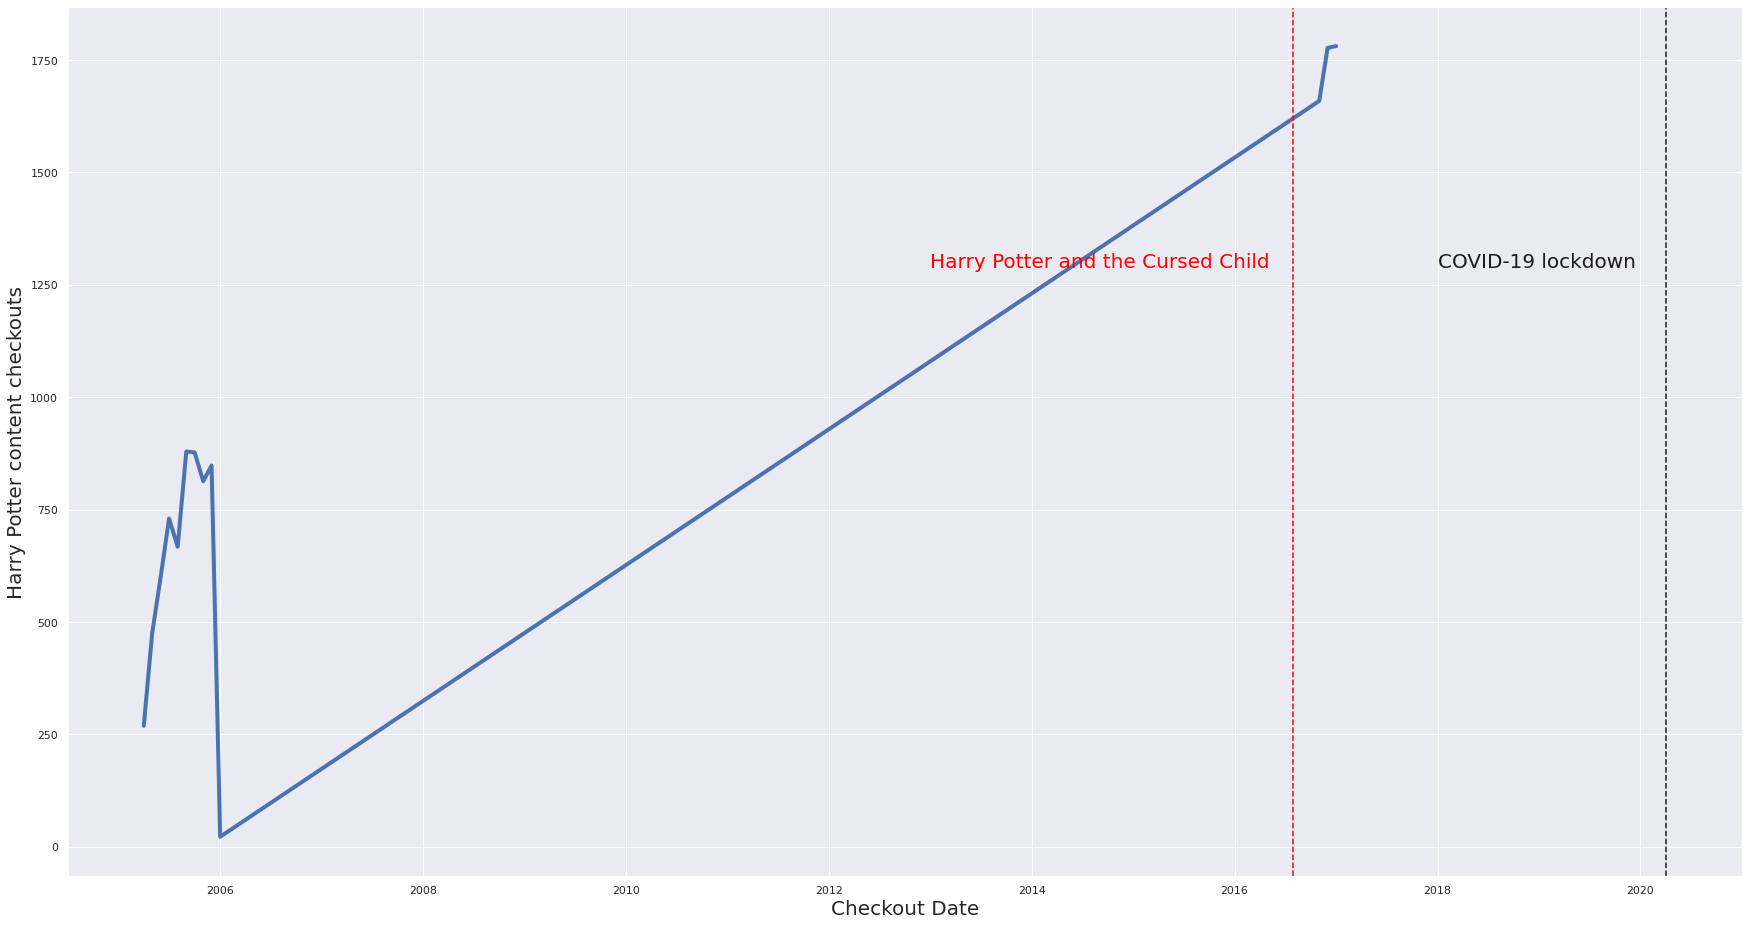

In [55]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = potter_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Harry Potter content checkouts", fontsize = 20)
p.axvline(datetime(2016, 7, 30), color="red", linestyle = "--")
p.axvline(datetime(2020, 4, 1), color="k", linestyle = "--")
p.text(datetime(2013, 1, 1), .7, 'Harry Potter and the Cursed Child', color="red", fontsize = 20, transform=trans)
p.text(datetime(2018, 1, 1), .7, 'COVID-19 lockdown', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

### Were people really reading more during first weeks of Covid lockdowns?

In [56]:
checkouts_by_month = data.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts')

In [57]:
checkouts_by_month = checkouts_by_month.reset_index()
checkouts_by_month['Date'] = pd.to_datetime(
    checkouts_by_month['CheckoutYear']*100 + checkouts_by_month['CheckoutMonth'], format="%Y%m"
)

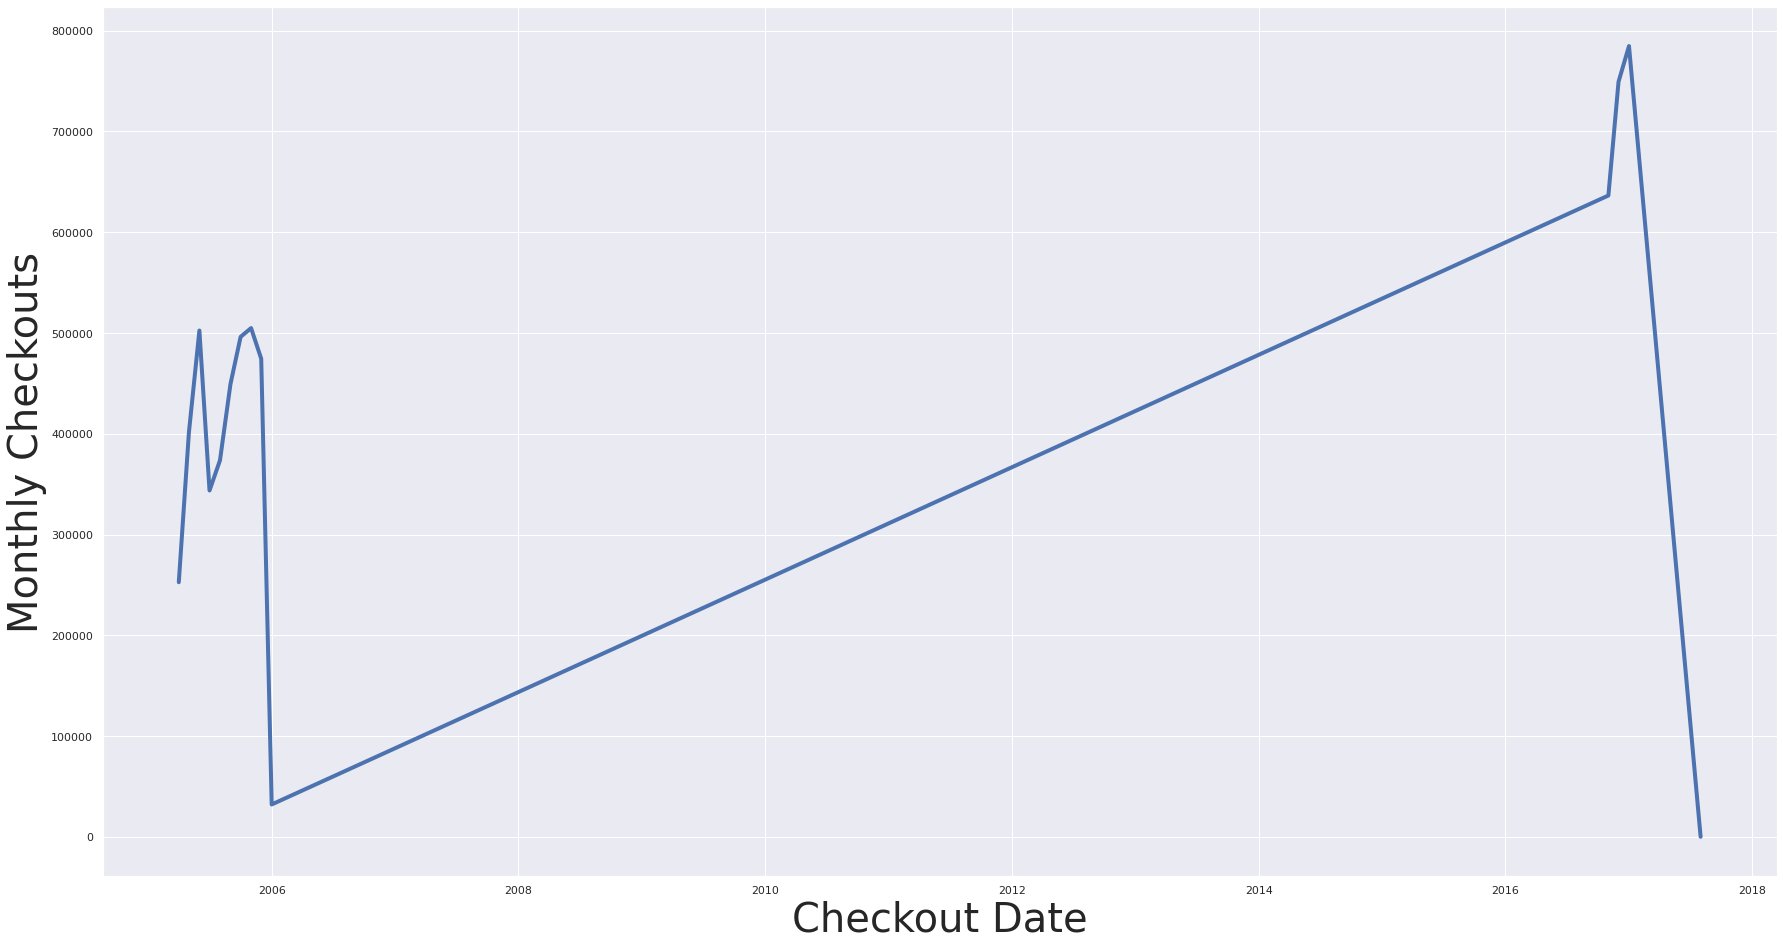

In [58]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = checkouts_by_month, linewidth=4)
p.set_xlabel("Checkout Date", fontsize = 40)
p.set_ylabel("Monthly Checkouts", fontsize = 40)
sns.set(rc={'figure.figsize':(30,16)})
p

Overall we can see that dramatic events of 2020 decreased checkouts amount in 2020 and 2021, but Harry Potter was more popular than ever on the other hand. That's why I wonder: which titles were most popular in the first half of 2020?

In [59]:
covid_data = data[(data['CheckoutYear'] == 2020) & (data['CheckoutMonth'].isin(range(1, 7)))]

In [60]:
covid_data_top_n = covid_data.groupby(data['Title']).sum('Checkouts').nlargest(10, columns=['Checkouts'])

In [61]:
covid_data_top_n

,CheckoutYear,CheckoutMonth,Checkouts
Title,,,


Exporing this shortlist, we can see that two of the titles can be related to a BLM movement. Let's grab some keywords and select titles which could be related to those events and check their popularity over time.

In [62]:
keywords = ['racism', 'race', 'people of color', 'white people', 'police brutality', 'martin luther king', 'skin color']
data['Title_lower'] = data['Title'].str.lower()

In [63]:
blm = data[data['Title_lower'].str.contains('|'.join(keywords))]

In [64]:
blm_checkouts_by_date = blm.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
blm_checkouts_by_date['Date'] = pd.to_datetime(
    blm_checkouts_by_date['CheckoutYear']*100 + blm_checkouts_by_date['CheckoutMonth'], format="%Y%m"
)

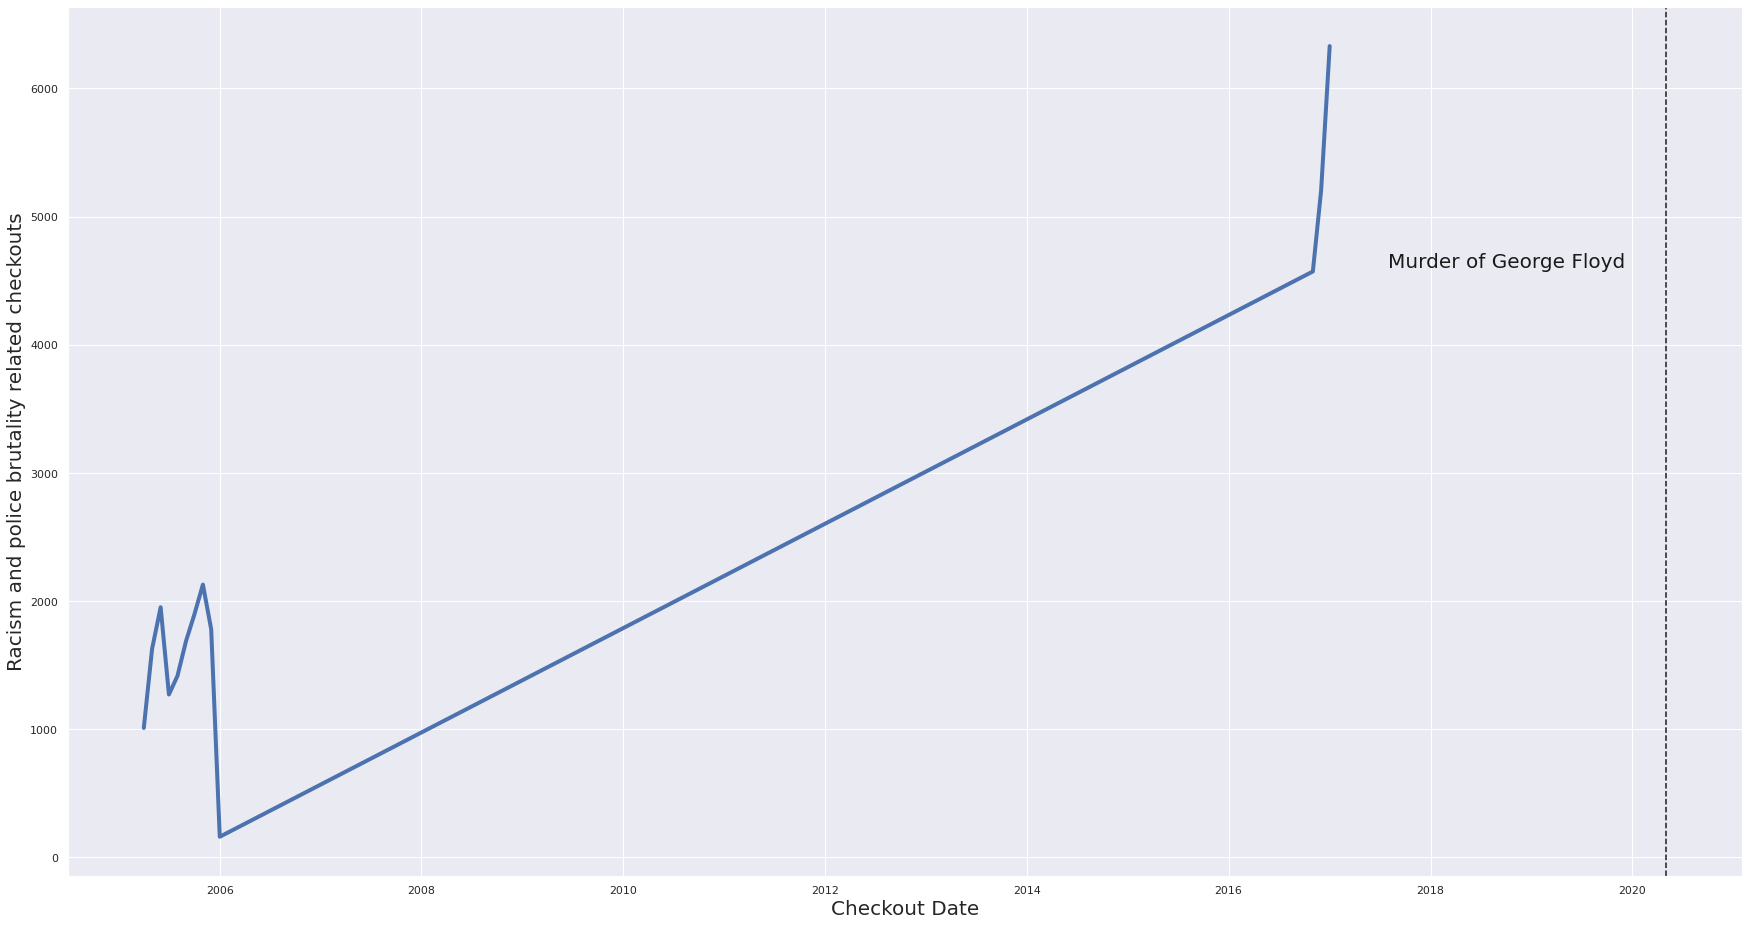

In [65]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = blm_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Racism and police brutality related checkouts", fontsize = 20)
p.axvline(datetime(2020, 5, 1), color="k", linestyle = "--")
p.text(datetime(2017, 8, 1), .7, 'Murder of George Floyd', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

#### We see a big dip before interest increase, since the murder of George Floyd happened in the May 2020, when the Covid lockdowns were very strict.